### Exercise: Simple kNN Regression

The goal of the exercise is to recreate and add details about the subjects learned in class.

### Part 1

Instructions:
Part 1: KNN by hand for k=1
* Read the Advertisement data.
* Apply the kNN algorithm by hand and plot the first graph comparing predicted values ​​with actual values

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Reading data and analyzing the quantity of data available:

In [168]:
dados = pd.read_csv('..\datasets\Advertising.csv')
X = dados.drop(columns=["Sales"])[["TV"]]
y = dados[["Sales"]]

print(f'Quantity of data available for this activity: {len(X)}')

Quantity of data available for this activity: 200


In [169]:
dados.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Splitting data into training data and test data:

In [170]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Below is defined the function that calculates the nearest neighbor from an array of numbers and a value:

In [171]:
def neighbor(array, value):
    distances = []
    for i in array:
        distances.append(float(np.abs(i-value.iloc[0])))
    min_idx = np.argmin(distances)

    return array[min_idx]

Performing tests with the nearest neighbors function:

In [172]:
y_predict = {}

for idx, value in X_test.iterrows():
    neighboor_distance = neighbor(X_train["TV"].to_list(), value)
    idx_number = X_train.index[X_train["TV"] == neighboor_distance].tolist()
    y_predict[idx] = y_train.loc[y_train.index == idx_number[0]]["Sales"].values.item()


Calculating the error to analyze the quality of the model:

In [173]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, list(y_predict.values()))

print(f"The MSE value for knn with k = 1 was: {mse}")


The MSE value for knn with k = 1 was: 14.226


What does MSE = 14 mean? It's important to note that the "Sales" and "TV" scales are the same; both work with a value of `$1,000`. Furthermore, the values ​​of "Sales," the predictor variable, range from `$3,200` to `$25,400`. Therefore, an MSE of 14.23 results in an RMSE of approximately 3.78, or a mean error of `$3,780`.

The range for "Sales" is `$22,200`, and the error is equivalent to 17.02% of the range. Considering these values, it's possible to judge the MSE result as reasonable or good, since although `$3,780` is a considerable difference, it's not considered a terrible value on a general scale.

In short, considering that I am using only k=1, the result of MSE = 14.23 allows the model to be read as reasonable or good.

Drawing the graph to visualize how the predictions performed:

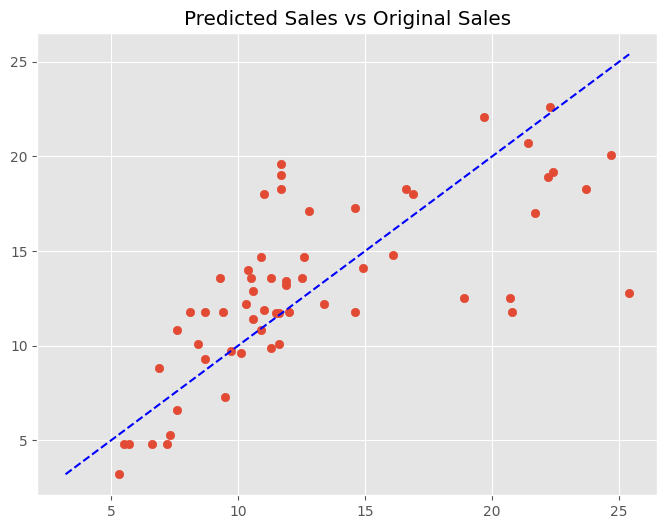

In [174]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.style.use("ggplot")
graph1 = ax.scatter(y_test, list(y_predict.values()))

min_val = min(min(y_test["Sales"]), min(list(y_predict.values())))
max_val = max(max(y_test["Sales"]), max(list(y_predict.values())))
ax.plot([min_val, max_val], [min_val, max_val], 'b--');
ax.set_title("Predicted Sales vs Original Sales");

The graph above shows the comparison between the predicted results and the actual values. It can be seen that some values ​​were predicted correctly, while others were either underestimated (predicting lower values ​​than the true ones) or overestimated (predicting higher values ​​than the true ones).

Overall, considering the model used, the predictions are acceptable, as most points are close to the line, with few outliers.

### Part 2

Part 2: Generalizing KNN
* Write the function for nearest neighbors with k > 1.
* Set k_list as the possible k values ranging from 1 to 70.
* For each value of k in k_list:
    * Also use sklearn KNearestNeighbors() to fit train data and then compare with the results found by your function.
    * Predict on the test data.

Functions for the algorithm with more than 1 neighbor:

In [175]:
def neighbors(array, value, k):
    distances = {}
    for i in range(0, len(array)):
        distances[i] = float(np.abs(array[i]-value))
    min_neighbors = dict(sorted(distances.items(), key=lambda item: item[1]))
    min_indx = list(min_neighbors.keys())[:k]
    return [array[i] for i in min_indx]

def kneighbors(X_test, X_train, y_train, k):
    y_predict = {}
    for idx, value in X_test.iterrows():
        values = []
        neighboor_distance = neighbors(X_train["TV"].to_list(), value.TV, k)
        for i in range(0, k):
            idx_number = X_train.index[X_train["TV"] == neighboor_distance[i]].tolist()
            values.append(y_train.loc[y_train.index == idx_number[0]]["Sales"].values.item()) 
    
        y_predict[idx] = sum(values)/len(values)
    
    return y_predict

kneighbors(X_test, X_train, y_train, 4);

Application of the algorithm created by me and the sklearn algorithm with a variety of values for k:

In [176]:
from sklearn.neighbors import KNeighborsRegressor

k_list = np.linspace(1, 70, num=20, dtype=int)
MSE_sklearn = {}
MSE_mine = {}

for i in k_list:
    neigh_sklearn = KNeighborsRegressor(n_neighbors=i)
    neigh_sklearn.fit(X_train, y_train)
    neigh_mine = list(kneighbors(X_test, X_train, y_train, i).values())
    predictions_sklearn = neigh_sklearn.predict(X_test)
    MSE_sklearn[f"{i} neighboors"] = mean_squared_error(y_test, predictions_sklearn)
    MSE_mine[f"{i} neighboors"] = mean_squared_error(y_test, neigh_mine)


Below you can see a dataframe created with the objective of storing, for later comparison, the MSE values ​​of the predictions made by sklearn and by my function.

In [177]:
dt_kneighboors = pd.DataFrame({"Neighboors": k_list, 
                               "MSE_sklearn":list(MSE_sklearn.values()), 
                               "MSE_mine": list(MSE_mine.values())})
dt_kneighboors

,Neighboors,MSE_sklearn,MSE_mine
0,1,14.350667,14.226000
1,4,8.542427,8.477969
2,8,8.708023,8.694846
3,11,9.495809,9.464826
4,15,9.660996,9.624301
5,19,9.873175,9.844023
6,22,9.473362,9.453357
7,26,9.655236,9.637780
8,30,10.237856,10.276617
9,33,10.400079,10.436124


To better represent the difference between the MSE generated by the values ​​predicted by sklearn and the MSE generated by the values ​​predicted by the function I wrote, I drew the graph below visually presenting this difference.

Note that the difference is small, but still present. It increases as the k values ​​increase. Another point to note is that my function's MSE starts out better than sklearn's. However, as the number of neighbors increases, sklearn's MSE becomes smaller than my function's, thus resulting in a smaller error.

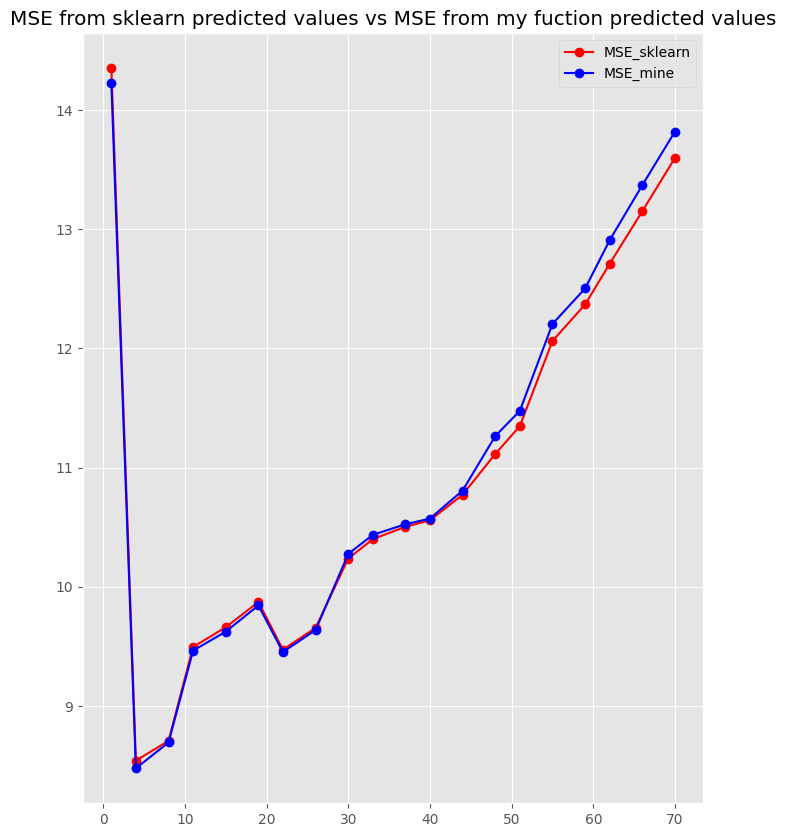

In [178]:
fig, ax = plt.subplots(figsize=(8, 10))
ax.plot(dt_kneighboors["Neighboors"], dt_kneighboors["MSE_sklearn"], 'o-r', label="MSE_sklearn")
ax.plot(dt_kneighboors["Neighboors"], dt_kneighboors["MSE_mine"], 'o-b', label="MSE_mine")
ax.set_title("MSE from sklearn predicted values vs MSE from my fuction predicted values");
ax.legend(["MSE_sklearn", "MSE_mine"]);

### Part 3

The goal here is to find the value of k of the best performing model based on the test MSE.

Instructions:
* Read the data into a Pandas dataframe object. 
* Select the sales column as the response variable and TV budget column as the predictor variable.
* Make a train-test split using sklearn.model_selection.train_test_split .
* Create a list of integer k values using numpy.linspace .
* For each value of k
    * Fit a kNN regression on train set.
    * Calculate MSE on test set and store it.
* Plot the test MSE values for each k.
* Find the k value associated with the lowest test MSE.